# Data Visualization

## Quantitiative Daten
Quantitative Daten sind Messwerte die in numerischer Form dargestellt werden.

Zur Visualisierung von quantitativen Daten werden meist Histogramme, Boxplots und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.csv`) realisiert.

In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [3]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [4]:
# Load the dataset and drop N/A values to make plot function calls simpler
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
df_interact(ti)

interactive(children=(IntSlider(value=0, description='row', max=182, step=5), IntSlider(value=0, description='…

(182 rows, 15 columns) total


In [22]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [73]:
%%R
# Init libraries
install.packages("lmtest")
install.packages("vcd", repos="http://R-Forge.R-project.org")
library(vcd)

In [104]:
%%R
ti <- read.csv("titanic.csv", header = TRUE, sep=",")
# Delete rows with empty values
# Source: https://stackoverflow.com/questions/9126840/delete-rows-with-blank-values-in-one-particular-column
ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$Survived) |
           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$Age) | ti$Ticket=="" | ti$Sex=="" ), ]

### Histogramme
Der Datensatz der Titanic enthält für jeden Passagier eine Zeile.

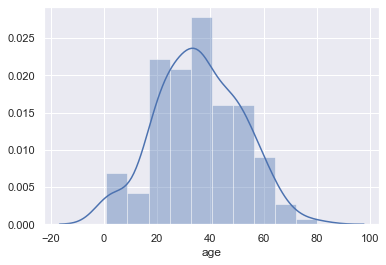

In [120]:
# Adding a semi-colon at the end tells Jupyter not to output the
# usual <matplotlib.axes._subplots.AxesSubplot> line
sns.distplot(ti['age']);

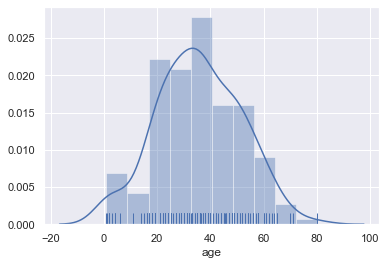

In [121]:
sns.distplot(ti['age'], rug=True);

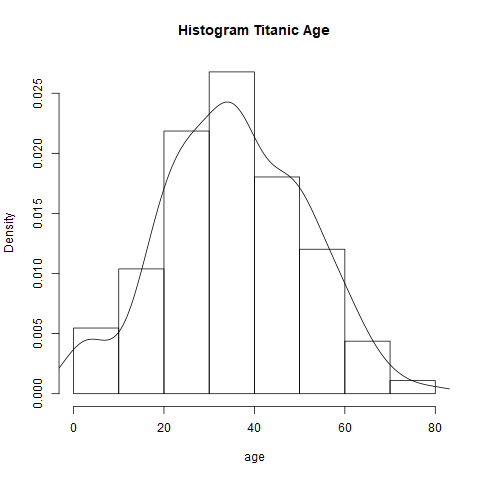

In [128]:
%%R
hist(ti$Age, freq=FALSE, breaks=10, xlab="age", main="Histogram Titanic Age")
dens <- density(ti$Age)
lines(dens)

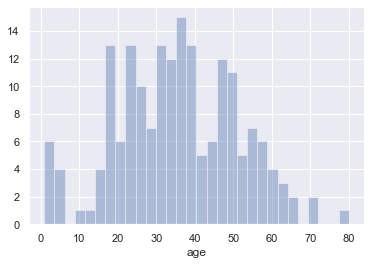

In [123]:
sns.distplot(ti['age'], kde=False, bins=30);

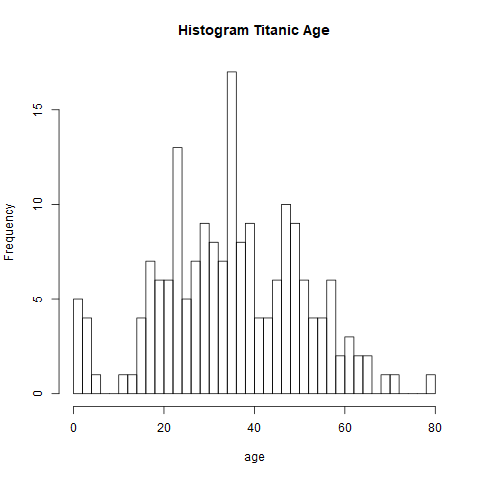

In [129]:
%%R
hist(ti$Age, breaks=30, xlab="age", main="Histogram Titanic Age")

## Qualitative Daten

## Anpassung von Plots

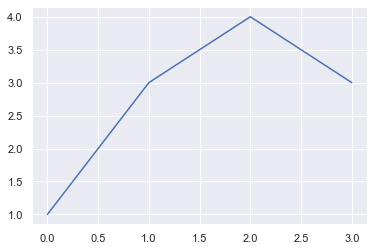

In [21]:
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

# Create a figure
f = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

In [22]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [23]:
# HIDDEN
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [24]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

# Load the dataset
ti = sns.load_dataset('titanic').reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
df_interact(ti)

interactive(children=(IntSlider(value=0, description='row', max=891, step=5), IntSlider(value=0, description='…

(891 rows, 15 columns) total


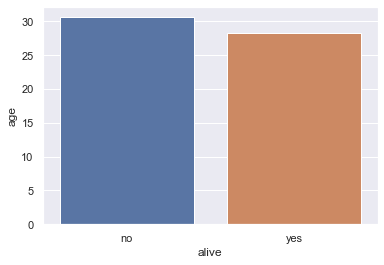

In [25]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

## Prinzipien der Visualisierung

## Prinzipien der Visualisierung II

## Visualisierungs Philosophie